In [1]:
import opendatasets as od

In [2]:
dataset = 'https://www.kaggle.com/datasets/mirichoi0218/insurance'


In [3]:
od.download(dataset)


Skipping, found downloaded files in ".\insurance" (use force=True to force download)


In [4]:
import os


In [5]:
data_dir = '.\insurance'


In [6]:
os.listdir(data_dir)


['.ipynb_checkpoints']

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format


In [2]:
df = pd.read_csv('insurance.csv')


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Univariate Distributions of Data: Age, BMI, and Charges**

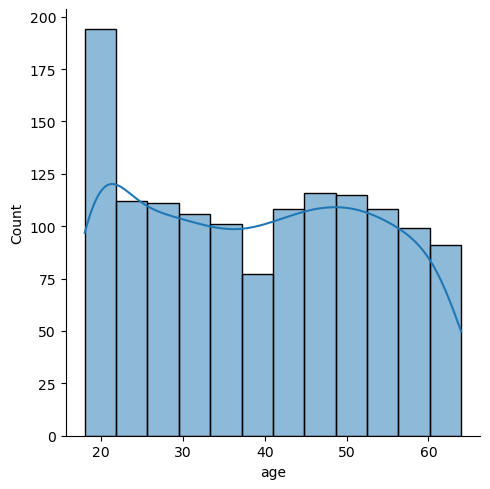

In [13]:
sns.displot(x='age', data=df, kde=1)
plt.show() 

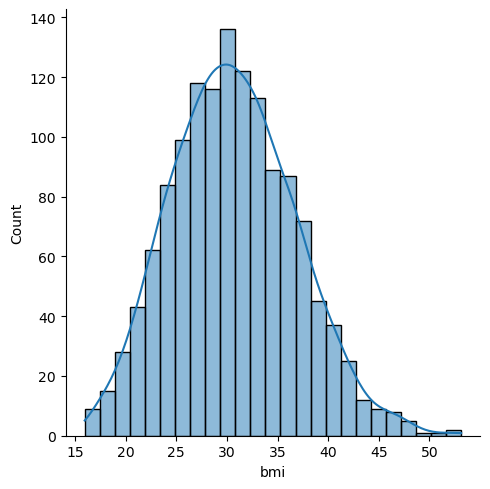

In [14]:
sns.displot(x='bmi', data=df, kde=1)
plt.show()

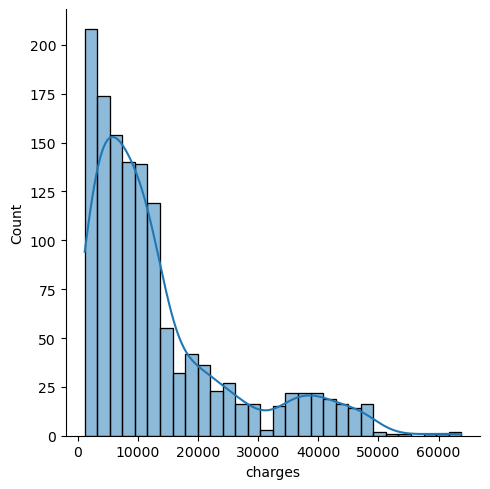

In [15]:
sns.displot(x='charges', data=df, kde=1)
plt.show()

## **Segment Data: Age, BMI,  and Charges Data**

In [4]:
age_cats = pd.cut(df['age'],
                 bins=[18, 35, 50, float('Inf')],
                 labels=['(18 - 34)', '(35 - 49)', '(50+)'])
age_cats.value_counts()

(18 - 34)    505
(35 - 49)    408
(50+)        356
Name: age, dtype: int64

In [5]:
bmi_cats = pd.cut(df['bmi'],
                 bins=[0, 18.5, 25, 29,  float('Inf')],
                 labels=['Underweight', 'Normalweight' , 'Overweight', 'Obese'])
#                  labels=['Underweight (<18.5)', 'Normalweight (18.5 - 24)' , 'Overweight (25 - 29)', 'Obese (>29)'])
bmi_cats.value_counts()

Obese           778
Overweight      313
Normalweight    226
Underweight      21
Name: bmi, dtype: int64

In [6]:
charges_cats = pd.cut(df['charges'],
                     bins=[0, 16000, 32500, 48500, 64000],
                     labels=['(0 - 16,000)', '(16,001 - 32,500)', '32,501 - 48,500', '48,501 - 64,000'])
charges_cats.value_counts()

(0 - 16,000)         992
(16,001 - 32,500)    192
32,501 - 48,500      139
48,501 - 64,000       15
Name: charges, dtype: int64

## **Bivariate Analysis: Age**

**Analysis by Age Groups**  

**Ages 18 - 34 (Smoking): 79% = No / 21% = Yes**

In [77]:
df[(df['age'] >= 18) & (df['age'] <= 34)].smoker.value_counts(normalize=1)

no    0.79
yes   0.21
Name: smoker, dtype: float64

**Ages 35 - 49 (Smoking): 78% = No / 22% = Yes**

In [78]:
df[(df['age'] >= 35) & (df['age'] <= 49)].smoker.value_counts(normalize=1)

no    0.78
yes   0.22
Name: smoker, dtype: float64

**Ages 50+ (Smoking): 82% = No / 18% = Yes**

In [83]:
df[(df['age'] > 49)].smoker.value_counts(normalize=1)

no    0.82
yes   0.18
Name: smoker, dtype: float64

**Ages 18 - 34: BMI Average = 30.05% (Obese)**

In [86]:
df[(df['age'] >=18) & (df['age'] <= 34)].bmi.mean()

30.05136612021856

****Ages 35 - 49: BMI Average = 30.5% (Obese)**

In [82]:
df[(df['age'] >= 35) & (df['age'] <=49)].bmi.mean()

30.545297029702972

**Ages 50+: BMI Average = 31.66% (Obese)**

In [84]:
df[(df['age'] > 49)].bmi.mean()

31.66006493506492

**Ages 18 - 34: Charges Average = $9673.31**

In [88]:
df[(df['age'] >= 18) & (df['age'] <= 34)].charges.mean()

9673.31690839526

**Ages 35 - 49: Charges Average = $13744.28**

In [89]:
df[(df['age'] >= 35) & (df['age'] <= 49)].charges.mean()

13744.285794455447

**Ages 50+: Charges Average = $17902.55**

In [90]:
df[(df['age'] > 49)].charges.mean()

17902.55207036364

**Ages 18 - 34: Region Domicile:**  
* **Southeast = 28%**  
* **Northeast = 24%**  
* **Southwest = 24%**  
* **Northwest = 24%**

In [106]:
df[(df['age'] >= 18) & (df['age'] <= 34)].region.value_counts(normalize=1)

southeast   0.28
northwest   0.24
southwest   0.24
northeast   0.24
Name: region, dtype: float64

**Ages 35 - 49: Region Domicile:**  
* **Southeast = 27%**
* **Northeast = 25%**
* **Southwest = 24%**
* **Northwest = 24%**


In [108]:
df[(df['age'] >= 35) & (df['age'] <= 49)].region.value_counts(normalize=1)

southeast   0.27
northeast   0.25
northwest   0.24
southwest   0.24
Name: region, dtype: float64

**Ages 35 - 49: Region Domicile:**  
* **Southeast = 26%**  
* **Southwest = 25%**  
* **Northwest = 24%**  
* **Northeast = 24%**

In [109]:
df[(df['age'] > 49)].region.value_counts(normalize=1)

southeast   0.26
southwest   0.25
northwest   0.24
northeast   0.24
Name: region, dtype: float64

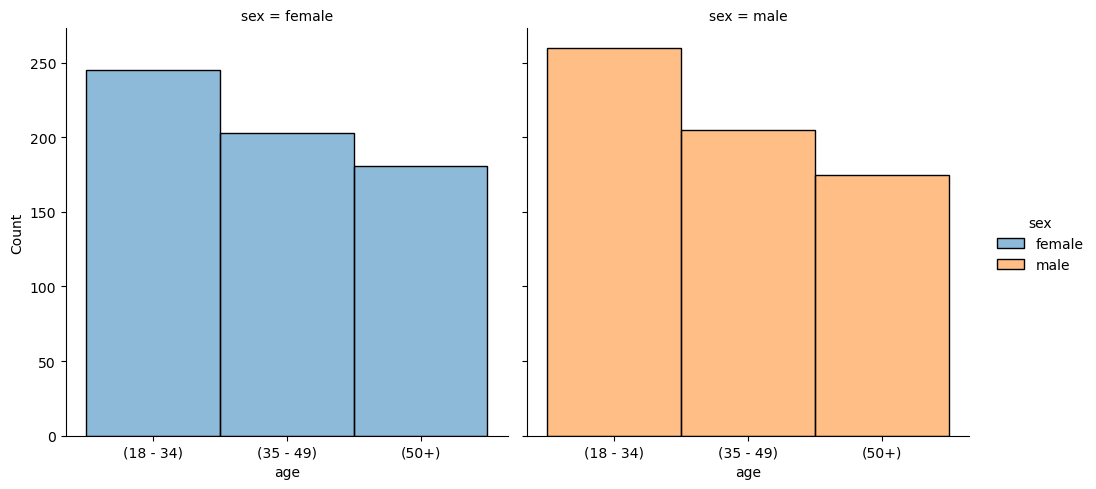

In [19]:
sns.displot(x=age_cats, data=df, hue='sex', col='sex')
plt.show()

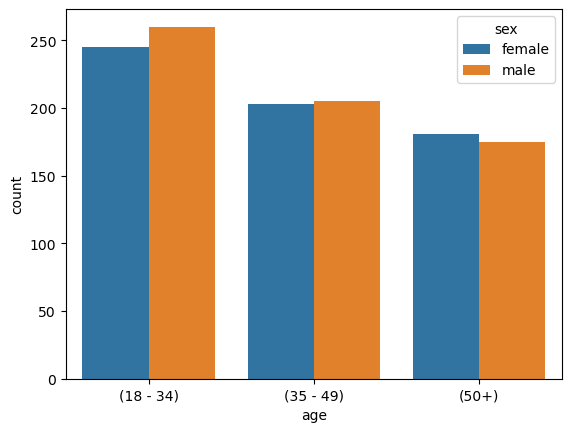

In [9]:
sns.countplot(x=age_cats, data=df, hue='sex')
plt.show()

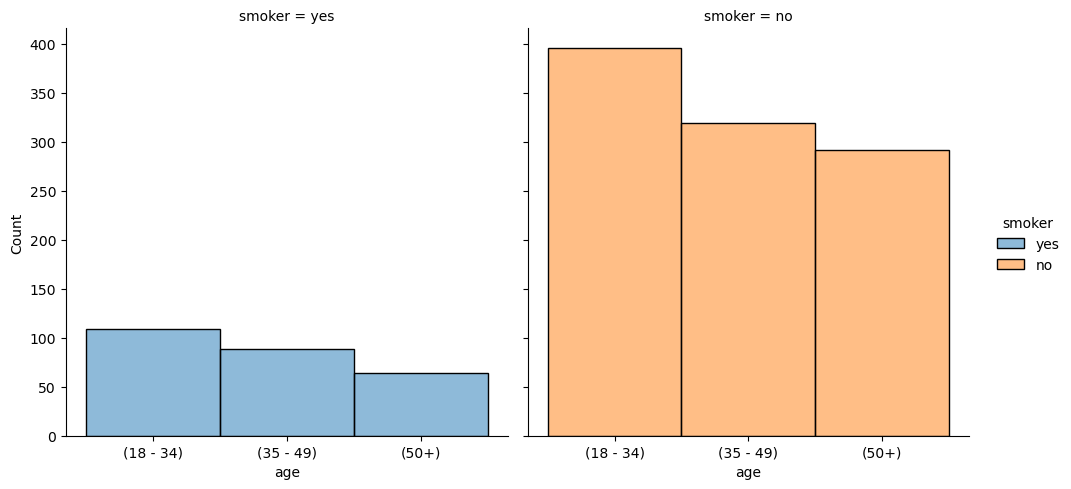

In [20]:
sns.displot(x=age_cats, hue='smoker', data=df, col='smoker')
plt.show()

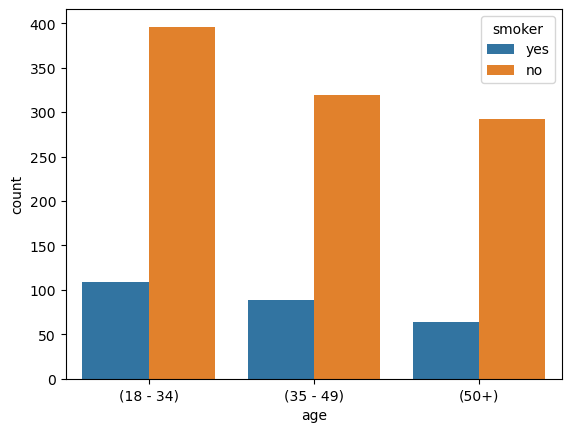

In [13]:
sns.countplot(x=age_cats, data=df, hue='smoker')
plt.show()

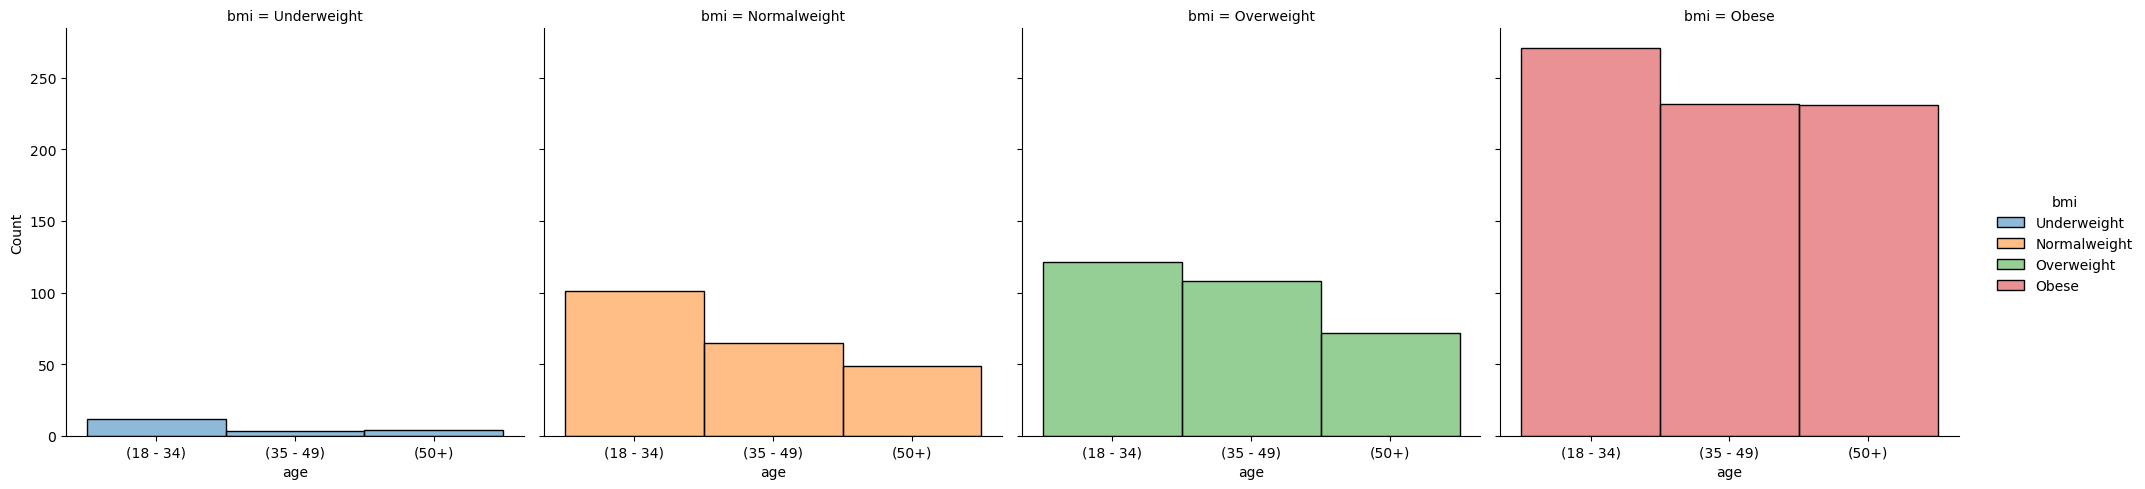

In [21]:
sns.displot(x=age_cats, data=df, hue=bmi_cats, col=bmi_cats)
plt.show()

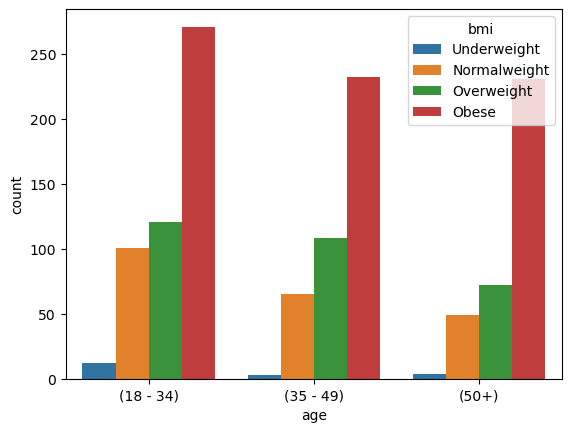

In [15]:
sns.countplot(x=age_cats, data=df, hue=bmi_cats)
plt.show()

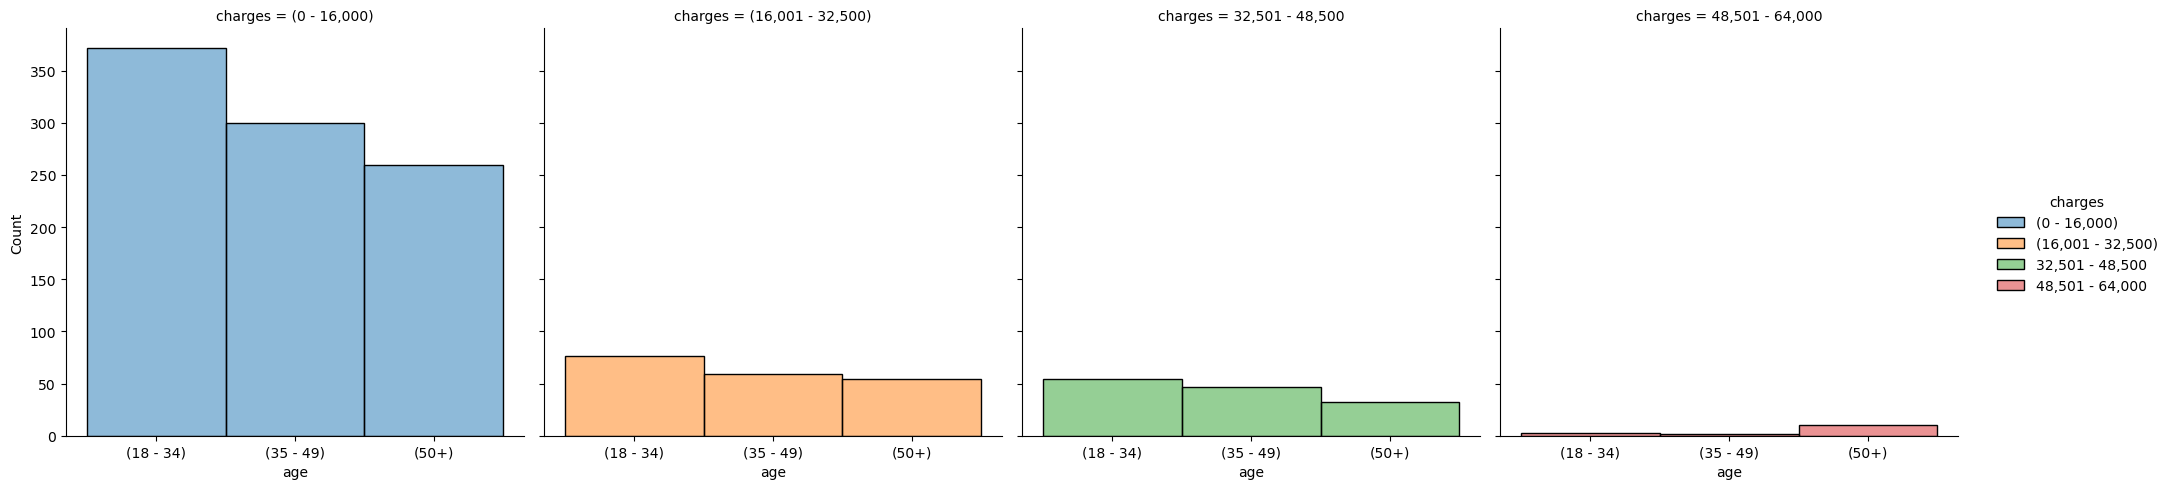

In [22]:
sns.displot(x=age_cats, data=df, hue=charges_cats, col=charges_cats)
plt.show()

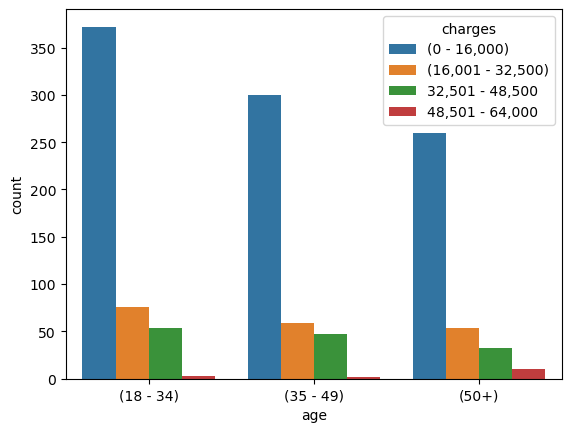

In [16]:
sns.countplot(x=age_cats, data=df, hue=charges_cats)
plt.show()

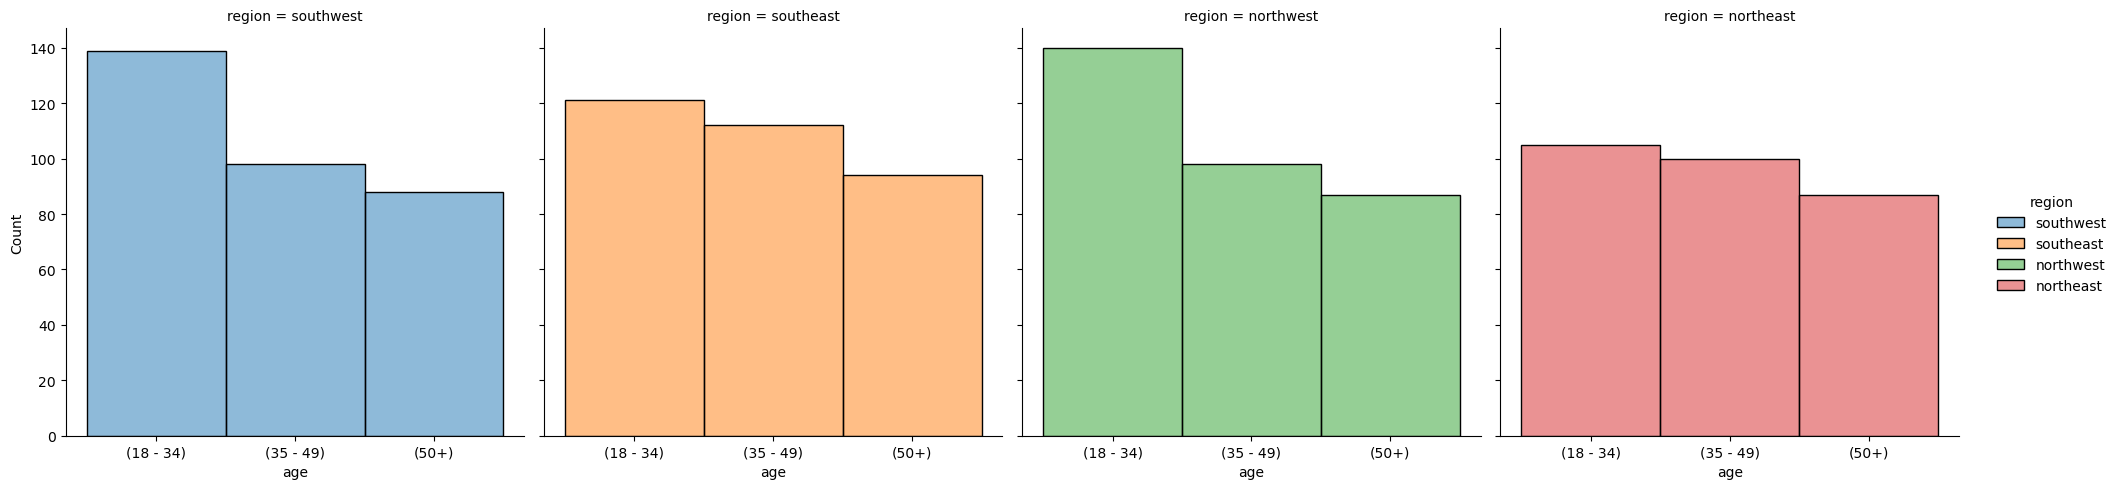

In [23]:
sns.displot(x=age_cats, data=df, hue='region', col='region')
plt.show()

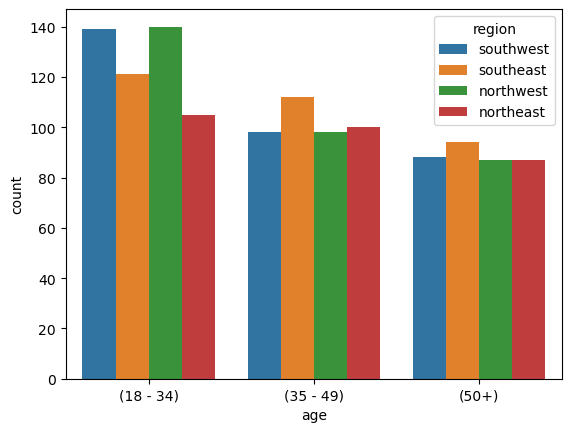

In [19]:
sns.countplot(x=age_cats, data=df, hue='region')
plt.show()

## Bivariate Analysis: Sex  

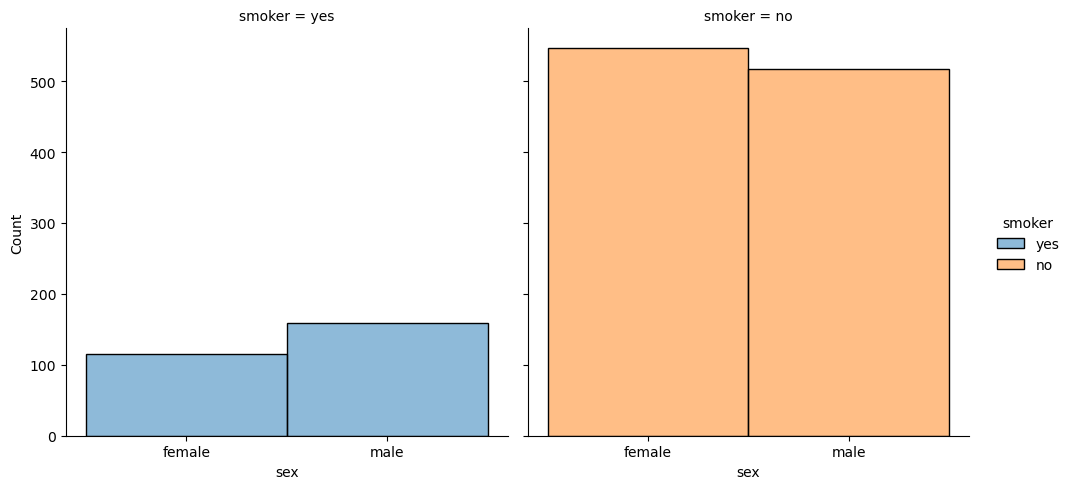

In [25]:
sns.displot(x='sex', data=df, hue='smoker', col='smoker')
plt.show()

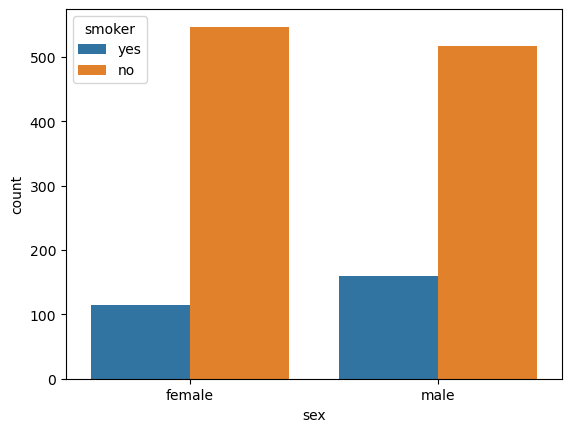

In [21]:
sns.countplot(x='sex', data=df, hue='smoker')
plt.show()

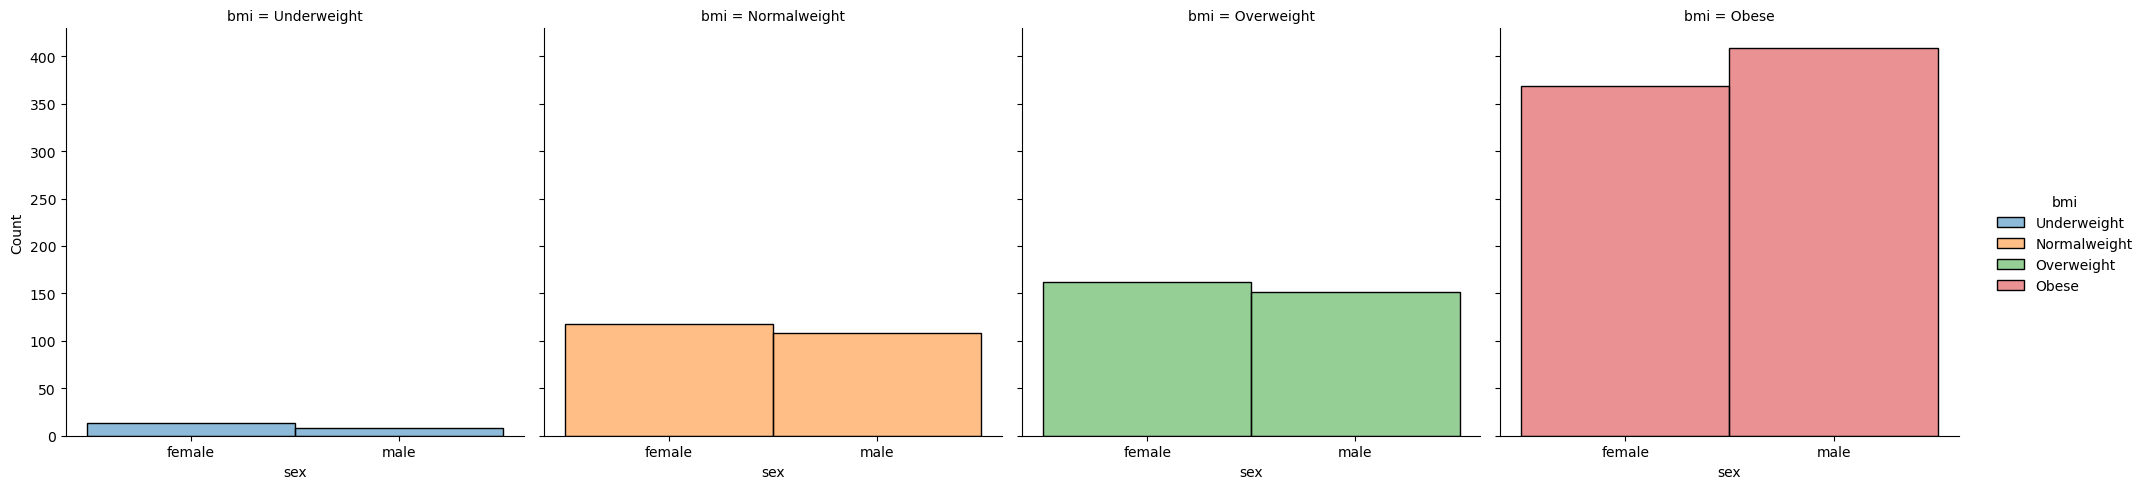

In [26]:
sns.displot(x='sex', data=df, hue=bmi_cats, col=bmi_cats)
plt.show()

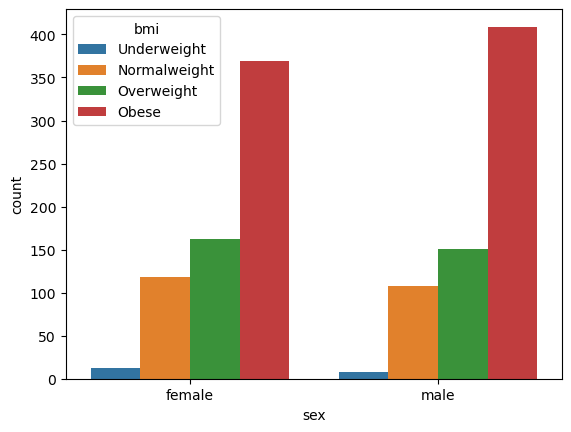

In [22]:
sns.countplot(x='sex', data=df, hue=bmi_cats)
plt.show()

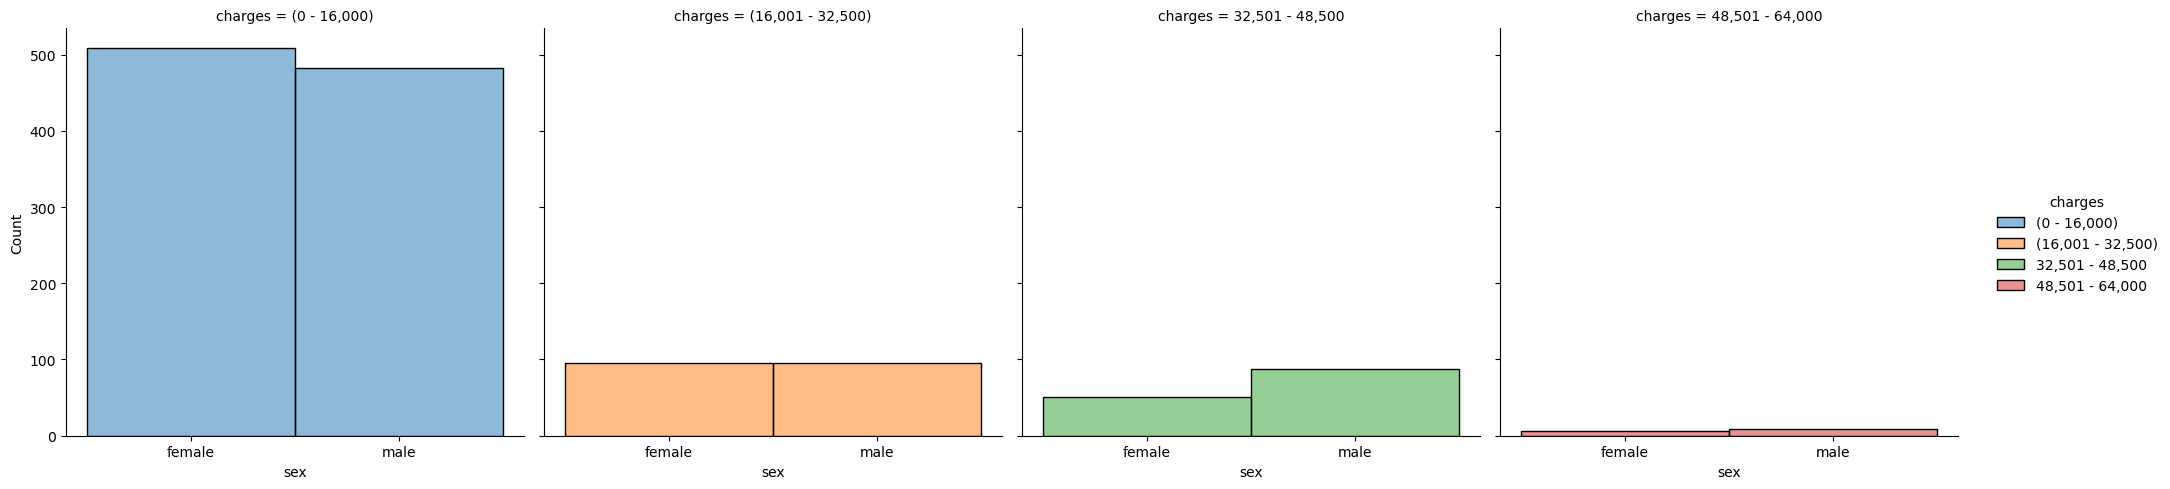

In [27]:
sns.displot(x='sex', data=df, hue=charges_cats, col=charges_cats)
plt.show()

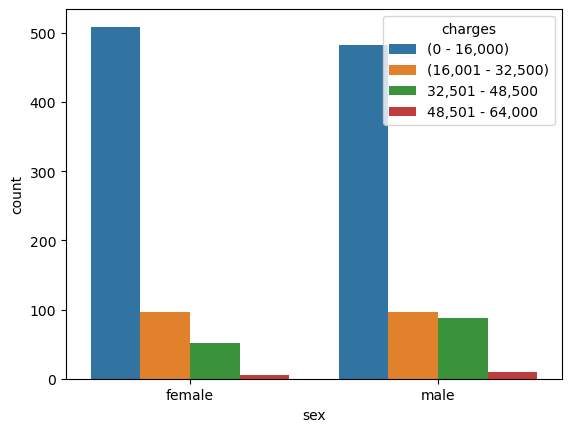

In [23]:
sns.countplot(x='sex', data=df, hue=charges_cats)
plt.show()

sex     region   
female  southeast   0.26
        northwest   0.25
        southwest   0.24
        northeast   0.24
male    southeast   0.28
        northeast   0.24
        southwest   0.24
        northwest   0.24
Name: region, dtype: float64


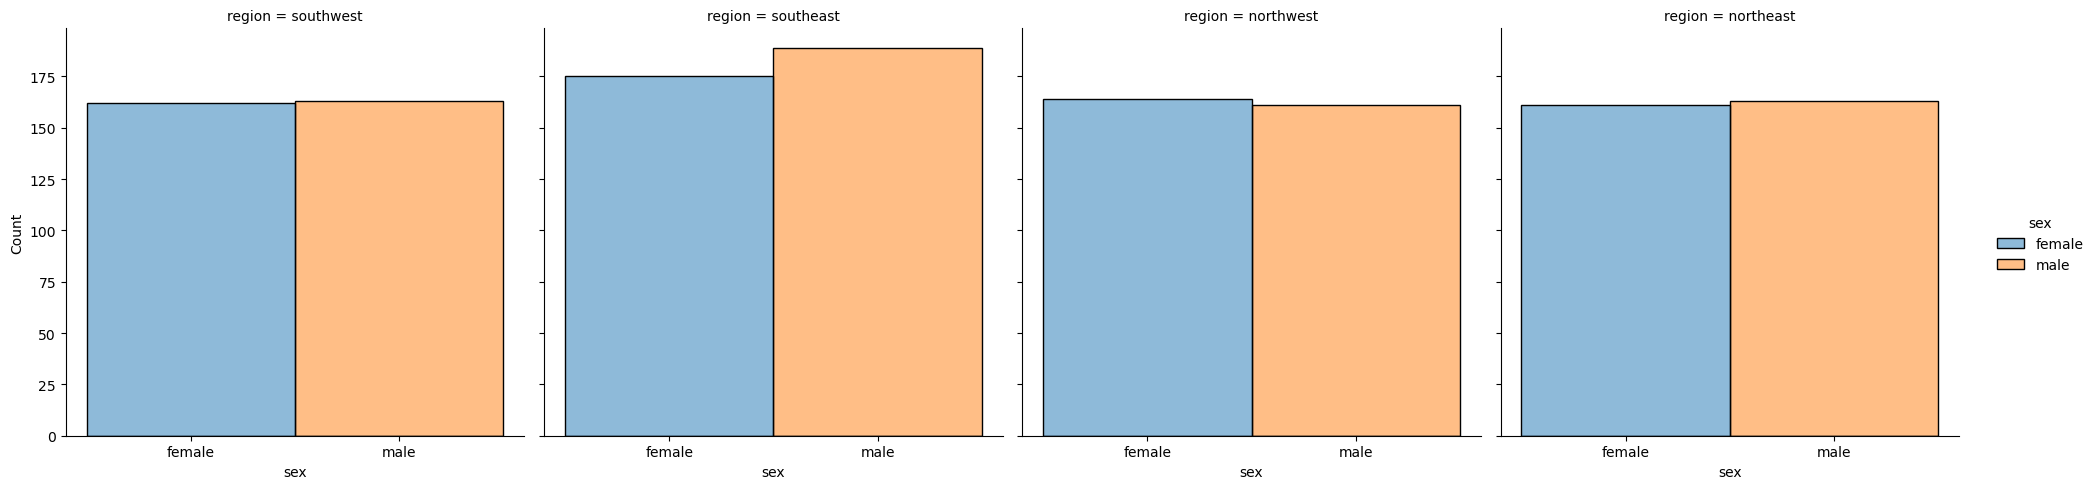

In [28]:
print(df.groupby('sex')['region'].value_counts(normalize=1))
sns.displot(x='sex', data=df, hue='sex', col='region' )
plt.show()

## Bivariate Analysis: BMI

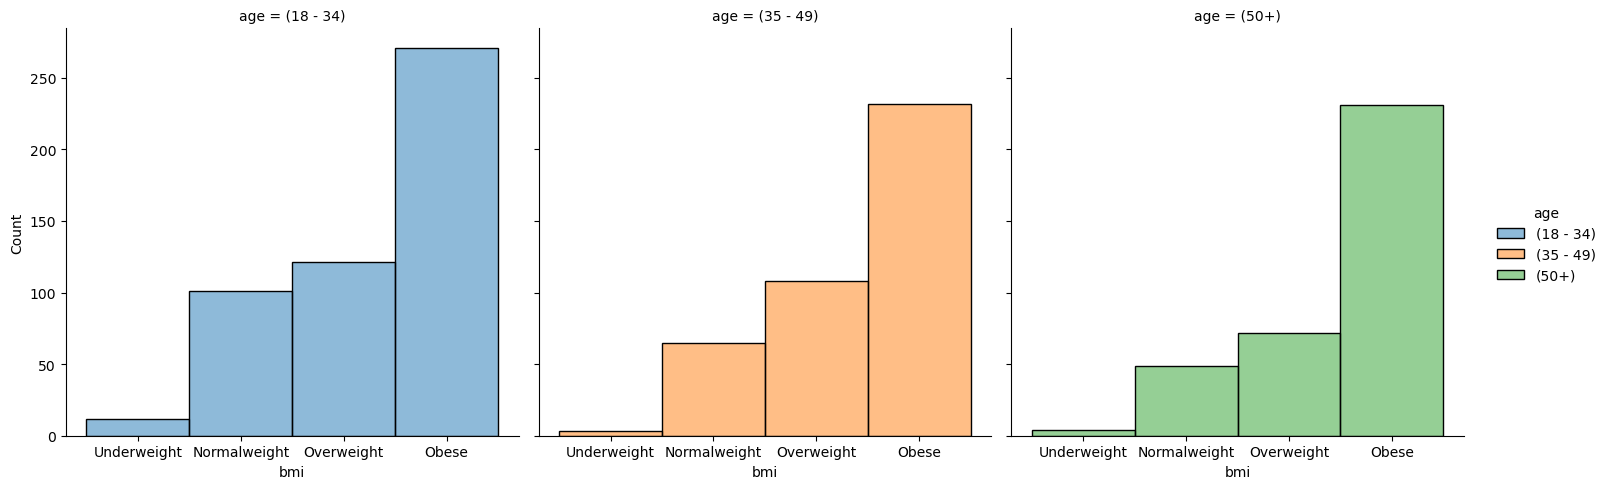

In [30]:
sns.displot(x=bmi_cats, data=df, hue=age_cats, col=age_cats)
plt.show()

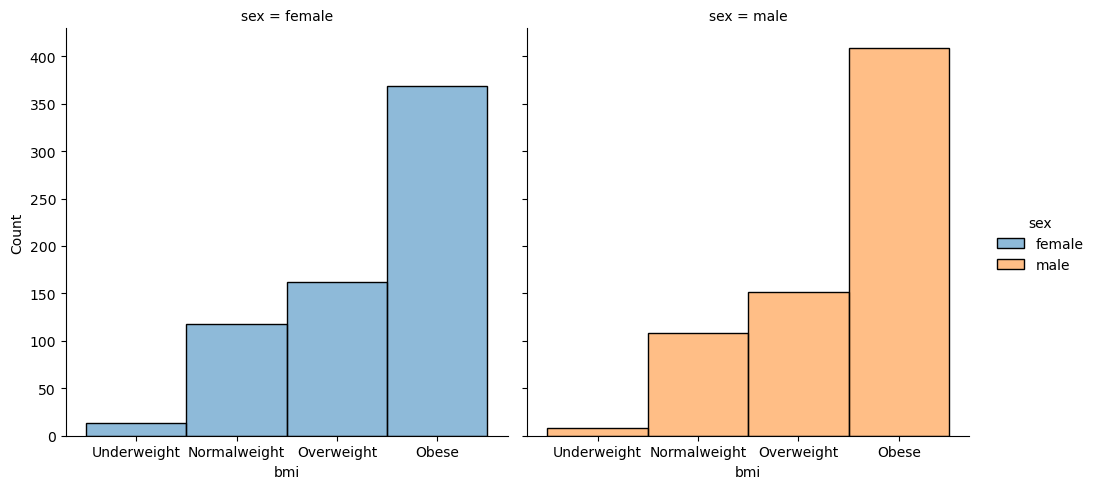

In [31]:
sns.displot(x=bmi_cats, data=df, hue='sex', col='sex')
plt.show()

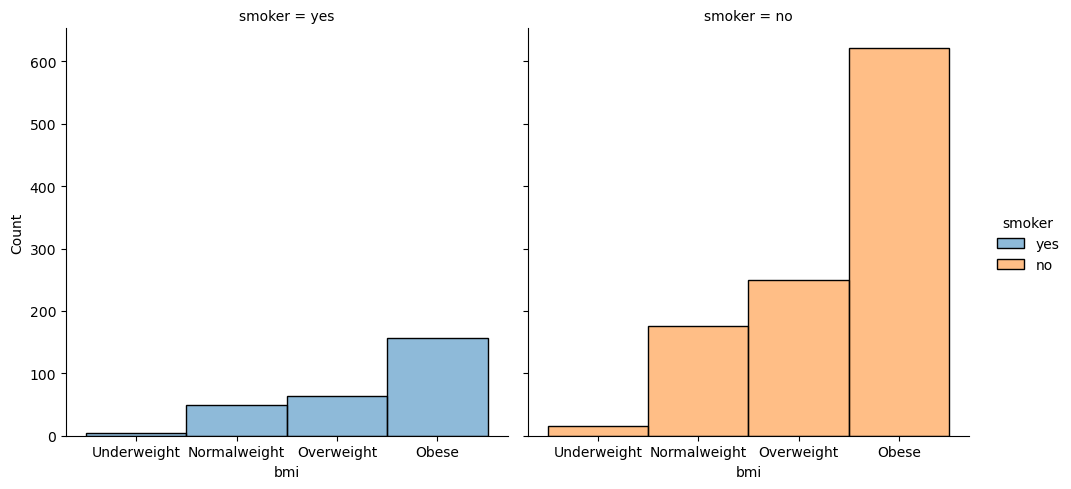

In [32]:
sns.displot(x=bmi_cats, data=df, hue='smoker', col='smoker')
plt.show()

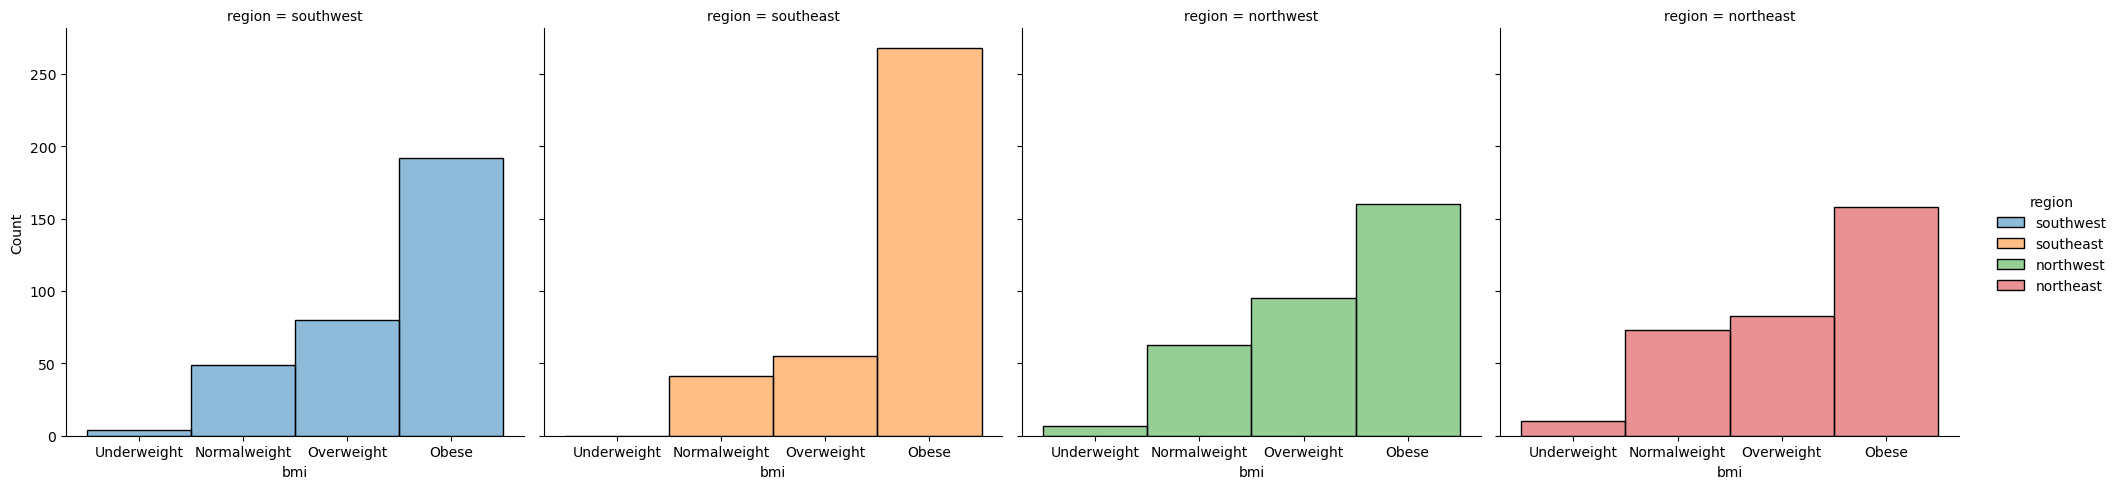

In [33]:
sns.displot(x=bmi_cats, data=df, hue='region', col='region')
plt.show()

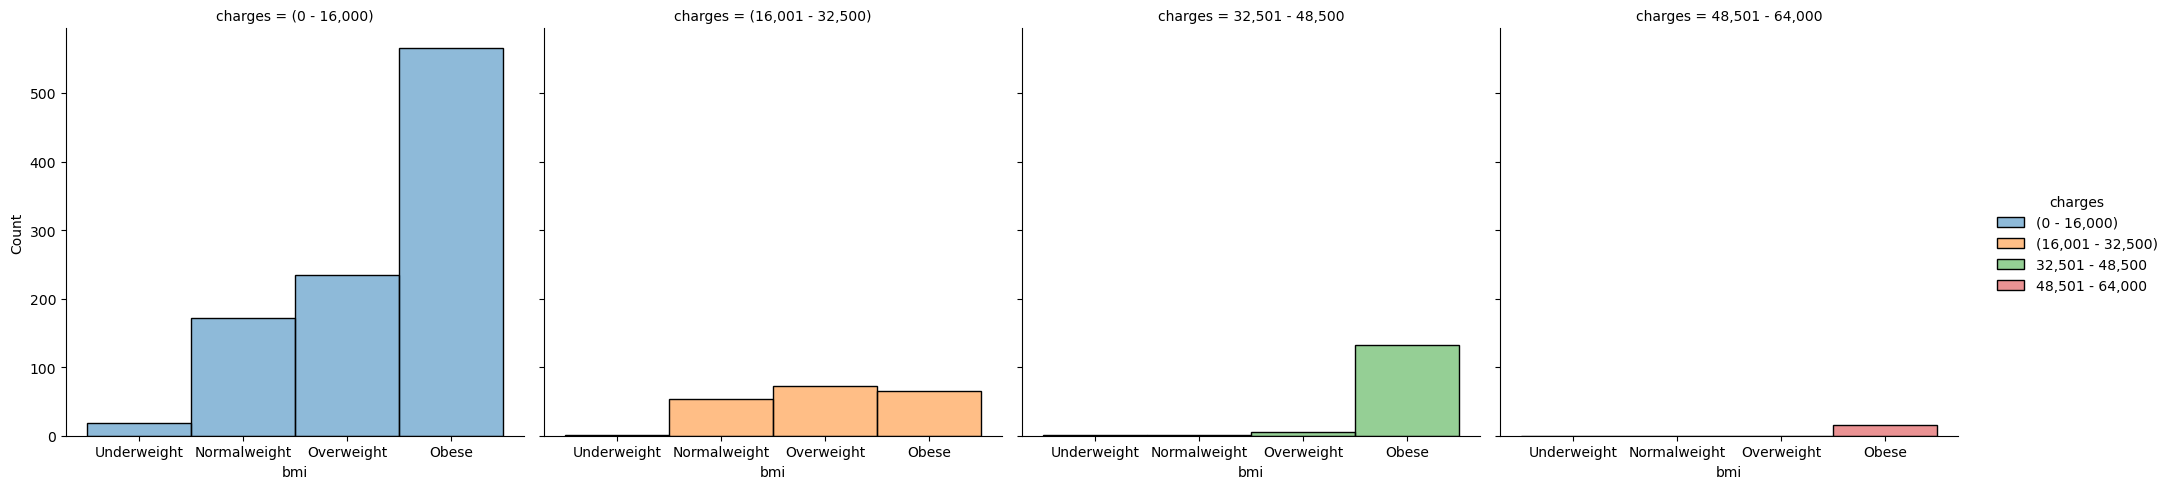

In [34]:
sns.displot(x=bmi_cats, data=df, hue=charges_cats, col=charges_cats)
plt.show()

## Bivariate Analysis: Smoker

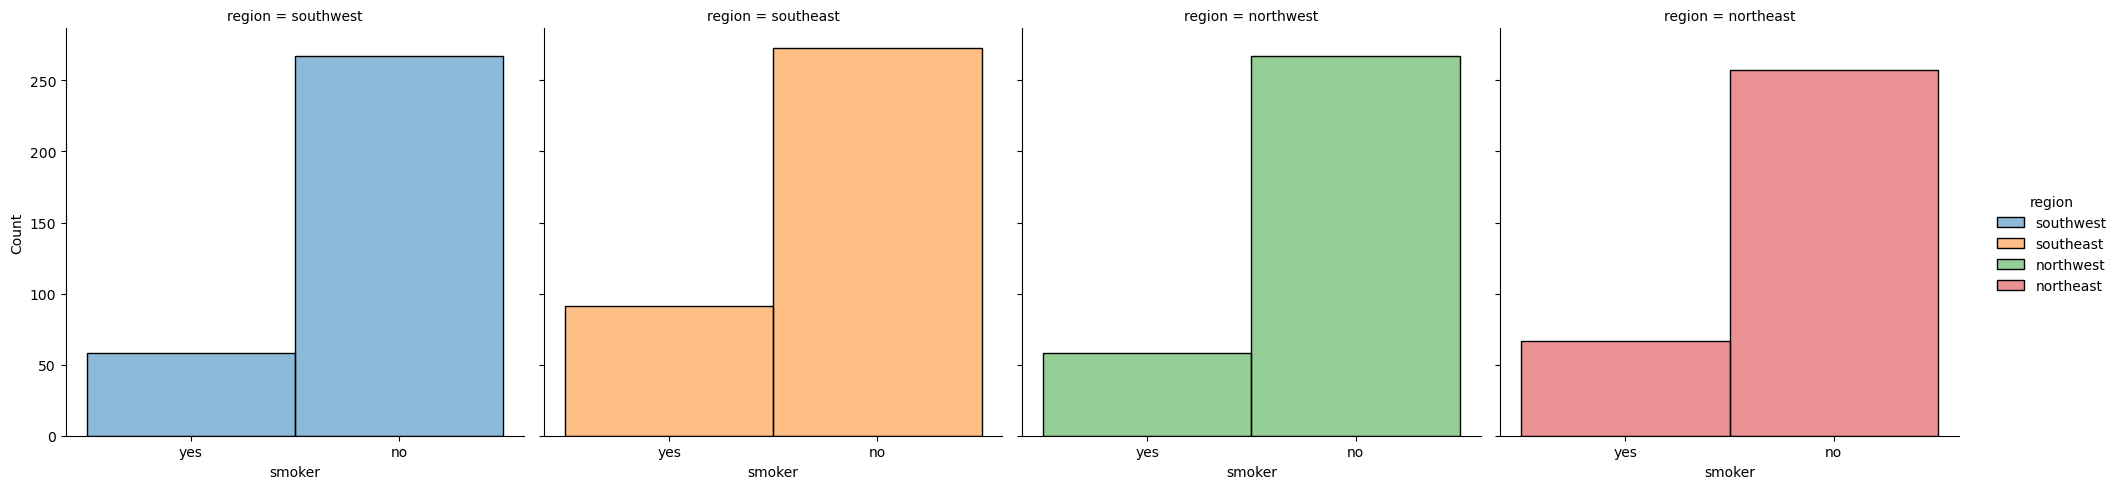

In [35]:
sns.displot(x='smoker', data=df, hue='region', col='region')
plt.show()

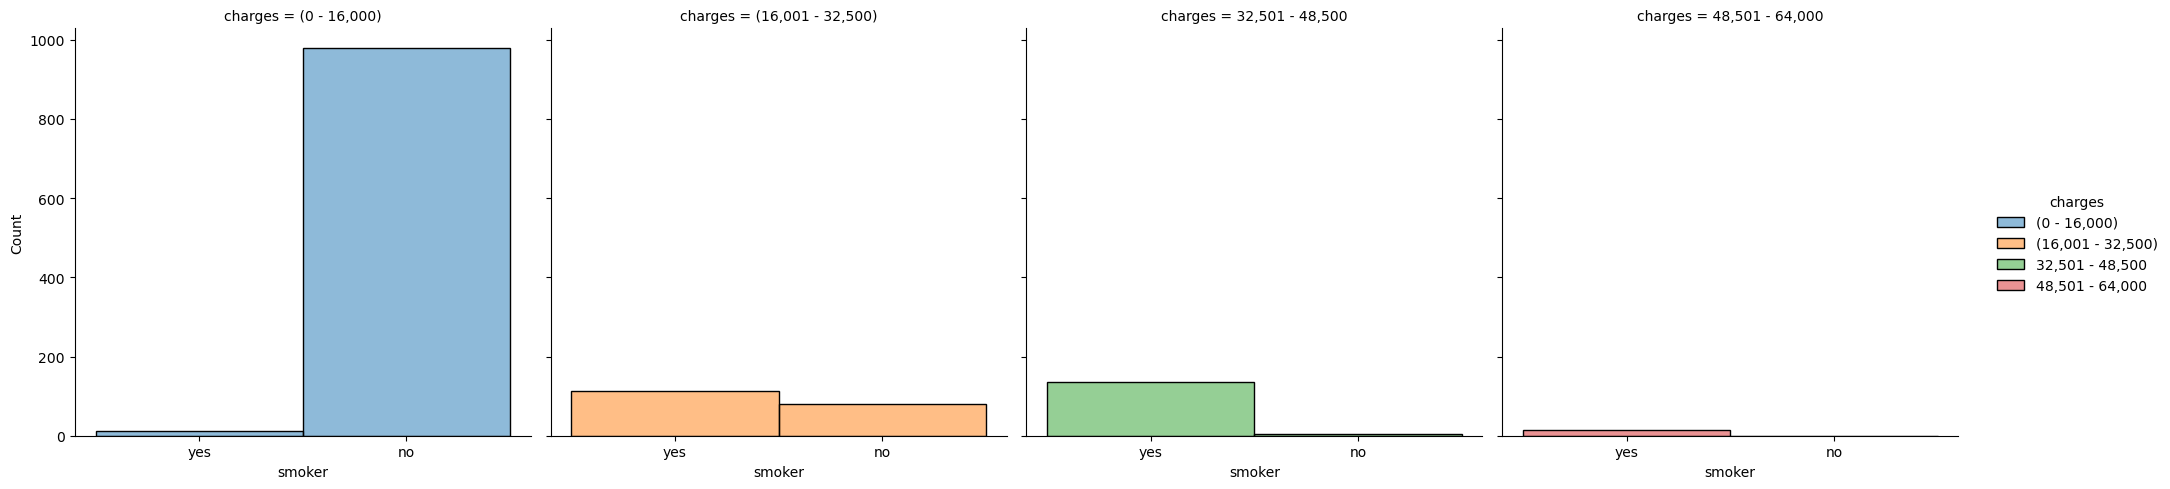

In [36]:
sns.displot(x='smoker', data=df, hue=charges_cats, col=charges_cats)
plt.show()

## Bivariate Analysis: Region

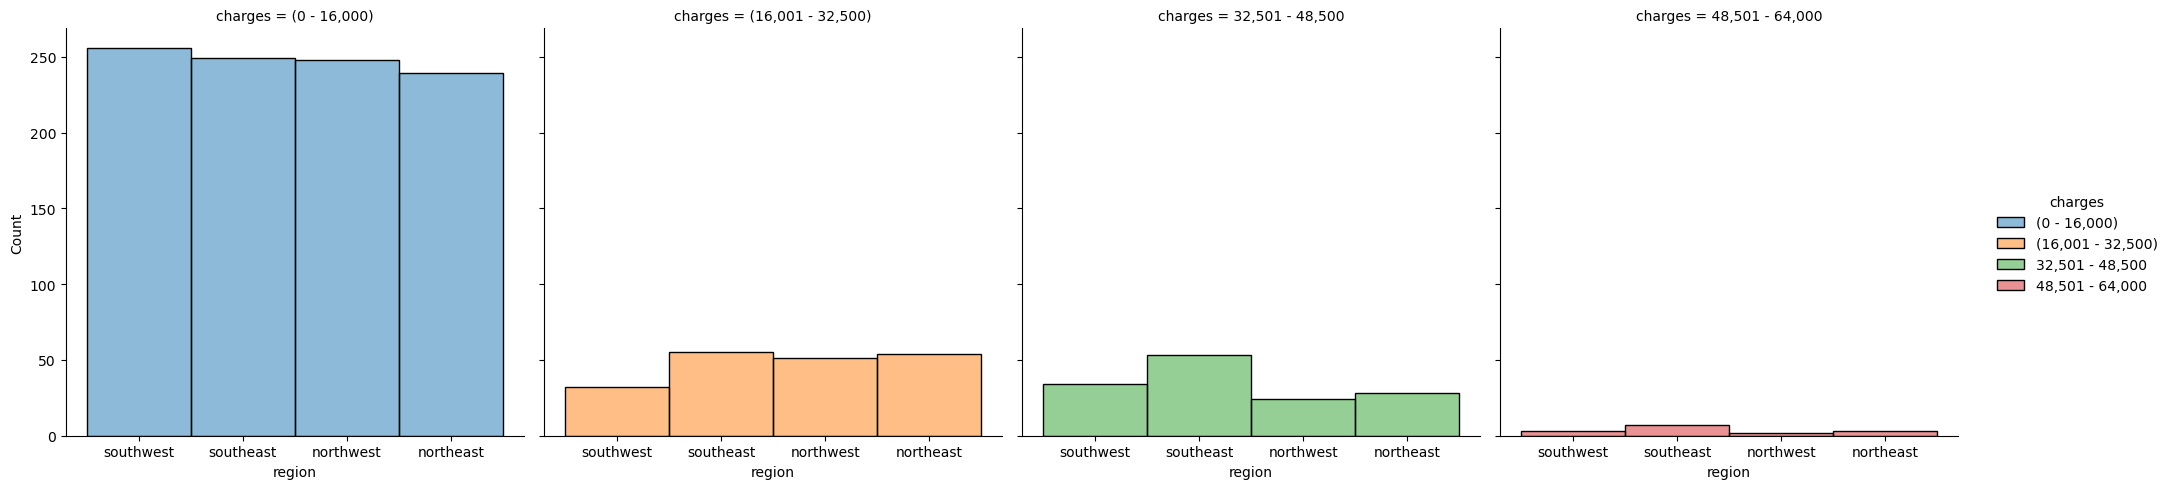

In [37]:
sns.displot(x='region', data=df, hue=charges_cats, col=charges_cats)
plt.show()

**Percentages and Averages Per Age**

In [77]:
df[(df['age'] >= 18) & (df['age'] <= 34)].smoker.value_counts(normalize=1)

no    0.79
yes   0.21
Name: smoker, dtype: float64

In [78]:
df[(df['age'] >= 35) & (df['age'] <= 49)].smoker.value_counts(normalize=1)

no    0.78
yes   0.22
Name: smoker, dtype: float64

In [83]:
df[(df['age'] > 49)].smoker.value_counts(normalize=1)

no    0.82
yes   0.18
Name: smoker, dtype: float64

In [86]:
df[(df['age'] >=18) & (df['age'] <= 34)].bmi.mean()

30.05136612021856

In [82]:
df[(df['age'] >= 35) & (df['age'] <=49)].bmi.mean()

30.545297029702972

In [84]:
df[(df['age'] > 49)].bmi.mean()

31.66006493506492

In [88]:
df[(df['age'] >= 18) & (df['age'] <= 34)].charges.mean()

9673.31690839526

In [89]:
df[(df['age'] >= 35) & (df['age'] <= 49)].charges.mean()

13744.285794455447

In [ ]:
df[(df['age'] >= 18) & (df['age'] <= 34)].charges.mean()

In [90]:
df[(df['age'] > 49)].charges.mean()

17902.55207036364

In [106]:
df[(df['age'] >= 18) & (df['age'] <= 34)].region.value_counts(normalize=1)

southeast   0.28
northwest   0.24
southwest   0.24
northeast   0.24
Name: region, dtype: float64

In [108]:
df[(df['age'] >= 35) & (df['age'] <= 49)].region.value_counts(normalize=1)

southeast   0.27
northeast   0.25
northwest   0.24
southwest   0.24
Name: region, dtype: float64

In [109]:
df[(df['age'] > 49)].region.value_counts(normalize=1)

southeast   0.26
southwest   0.25
northwest   0.24
northeast   0.24
Name: region, dtype: float64

**Percentages and Averages Per Sex**

In [62]:
df[df.sex == 'male'].smoker.value_counts(normalize=1)

no    0.76
yes   0.24
Name: smoker, dtype: float64

In [96]:
df[df.sex == 'female'].smoker.value_counts(normalize=1)

no    0.83
yes   0.17
Name: smoker, dtype: float64

In [101]:
df[df.sex == 'male'].bmi.mean()

30.943128698224832

In [102]:
df[df.sex == 'female'].bmi.mean()

30.377749244713023

In [104]:
df[df.sex == 'male'].charges.mean()

13956.751177721886

In [105]:
df[df.sex == 'female'].charges.mean()

12569.57884383534

In [110]:
df[df.sex == 'male'].region.value_counts(normalize=1)

southeast   0.28
northeast   0.24
southwest   0.24
northwest   0.24
Name: region, dtype: float64

In [111]:
df[df.sex == 'female'].region.value_counts(normalize=1)

southeast   0.26
northwest   0.25
southwest   0.24
northeast   0.24
Name: region, dtype: float64

**Percentages and Averages Per BMI**

In [118]:
df[df.smoker == 'yes'].bmi.mean()

30.708448905109503

In [119]:
df[df.smoker == 'no'].bmi.mean()

30.651795112781922

In [124]:
df[df.region == 'northeast'].bmi.mean()

29.17350308641976

In [125]:
df[df.region == 'southeast'].bmi.mean()

33.35598901098903

In [126]:
df[df.region == 'northwest'].bmi.mean()

29.199784615384626

In [127]:
df[df.region == 'southwest'].bmi.mean()

30.59661538461538

In [41]:
df.groupby(bmi_cats).mean()

,age,bmi,children,charges
bmi,,,,
Underweight,32.38,17.61,1.05,8657.62
Normalweight,36.89,22.66,1.12,10435.44
Overweight,39.08,27.16,1.02,11079.74
Obese,40.11,34.75,1.12,15099.80


**Percentages and Averages Per Smoker**

In [128]:
df[df.smoker == 'yes'].region.value_counts(normalize=1)

southeast   0.33
northeast   0.24
southwest   0.21
northwest   0.21
Name: region, dtype: float64

In [129]:
df[df.smoker == 'no'].region.value_counts(normalize=1)

southeast   0.26
northwest   0.25
southwest   0.25
northeast   0.24
Name: region, dtype: float64

In [131]:
df[df.smoker == 'yes'].charges.mean()

32050.23183153285

In [132]:
df[df.smoker == 'no'].charges.mean()

8434.268297856199

****Percentages and Averages Per Region**

In [138]:
df[df.region == 'northeast'].charges.mean()

13406.3845163858

In [139]:
df[df.region == 'southeast'].charges.mean()

14735.411437609895

In [140]:
df[df.region == 'northwest'].charges.mean()

12417.575373969228

In [141]:
df[df.region == 'southwest'].charges.mean()

12346.93737729231

In [40]:
df.groupby(charges_cats).mean()

,age,bmi,children,charges
charges,,,,
"(0 - 16,000)",38.92,30.48,1.07,7212.77
"(16,001 - 32,500)",40.42,28.07,1.21,22099.26
"32,501 - 48,500",38.28,34.77,1.16,40022.67
"48,501 - 64,000",51.00,37.93,0.87,52969.99


In [56]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.27,29.17,1.05,13406.38
northwest,39.20,29.20,1.15,12417.58
southeast,38.94,33.36,1.05,14735.41
southwest,39.46,30.60,1.14,12346.94


In [57]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [39]:
# age_cats 
# bmi_cats  
# charges_cats